In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [36]:
df = pd.read_csv('data_science_job.csv')
df.sample(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
2656,2290,city_114,0.926,Male,Has relevent experience,no_enrollment,Masters,STEM,15.0,10000+,Pvt Ltd,5.0,0.0
1423,17611,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6.0,NaN,NaN,47.0,1.0
551,11739,city_114,0.926,Male,Has relevent experience,Part time course,Graduate,STEM,18.0,100-500,NGO,84.0,0.0
18536,33237,city_114,0.926,Male,Has relevent experience,Part time course,Graduate,Arts,14.0,<10,Pvt Ltd,60.0,0.0
10815,13501,city_90,0.698,Other,Has relevent experience,no_enrollment,Graduate,STEM,7.0,1000-4999,Public Sector,11.0,0.0
10697,32603,city_102,0.804,Male,Has relevent experience,Full time course,NaN,NaN,20.0,<10,Early Stage Startup,39.0,0.0
16329,14531,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,11.0,10000+,Pvt Ltd,100.0,0.0
958,6025,city_64,0.666,Female,Has relevent experience,no_enrollment,Graduate,STEM,4.0,50-99,NaN,14.0,0.0
18247,22637,city_16,0.910,Male,No relevent experience,Part time course,Masters,STEM,20.0,10000+,Pvt Ltd,26.0,0.0
9511,31213,city_73,0.754,Male,Has relevent experience,Full time course,High School,NaN,4.0,NaN,NaN,52.0,1.0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  18679 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.9+ MB


In [38]:
df.isnull().mean()

enrollee_id               0.000000
city                      0.000000
city_development_index    0.025003
gender                    0.235306
relevent_experience       0.000000
enrolled_university       0.020148
education_level           0.024011
major_discipline          0.146832
experience                0.003393
company_size              0.309949
company_type              0.320493
training_hours            0.039983
target                    0.000000
dtype: float64

In [39]:
X = df[['city_development_index', 'experience', 'training_hours']]
X.head()

,city_development_index,experience,training_hours
0,0.920,20.0,36.0
1,0.776,15.0,47.0
2,0.624,5.0,83.0
3,0.789,0.0,52.0
4,0.767,20.0,8.0


### Mean Median Imputation Using Pandas

/Users/bibekjoshi01/Drive X/my-projects/ai-ml-journey/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: divide by zero encountered in dot
  c = dot(X, X_T.conj())
/Users/bibekjoshi01/Drive X/my-projects/ai-ml-journey/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: overflow encountered in dot
  c = dot(X, X_T.conj())
/Users/bibekjoshi01/Drive X/my-projects/ai-ml-journey/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: invalid value encountered in dot
  c = dot(X, X_T.conj())
/Users/bibekjoshi01/Drive X/my-projects/ai-ml-journey/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: divide by zero encountered in dot
  c = dot(X, X_T.conj())
/Users/bibekjoshi01/Drive X/my-projects/ai-ml-journey/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: overflow encountered in dot
  c = dot(X, X_T.conj()

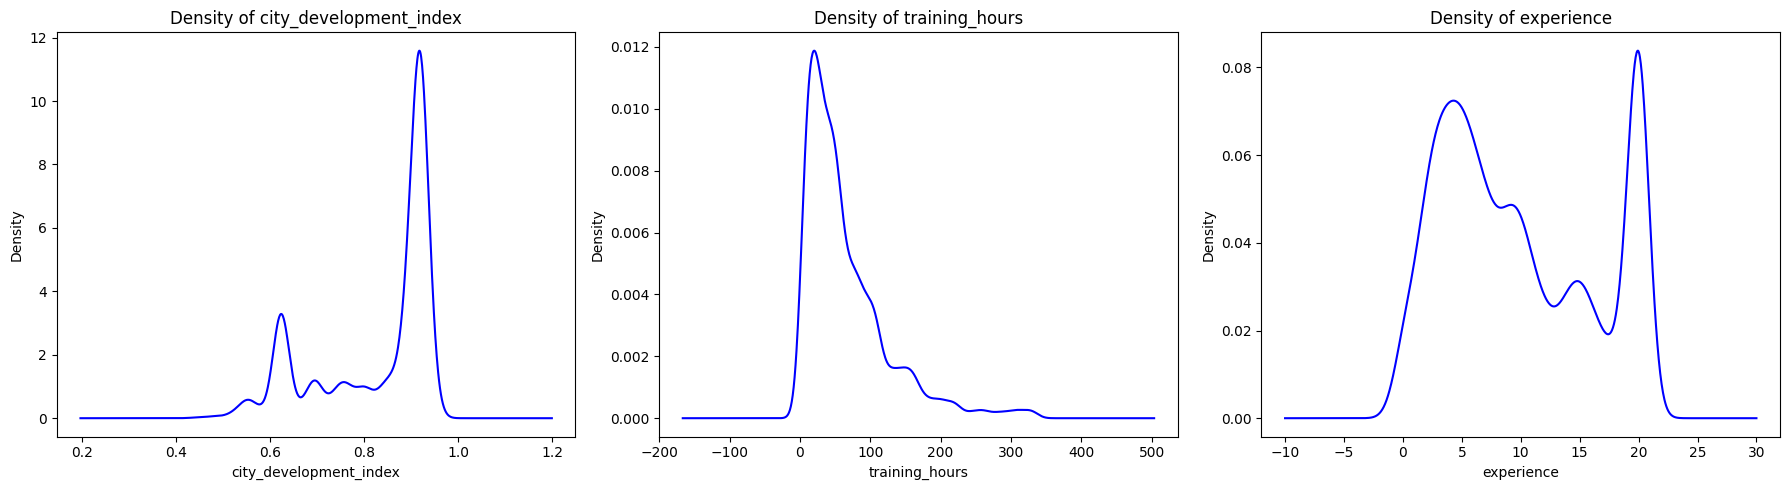

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

columns = ['city_development_index', 'training_hours', 'experience']

for i, col in enumerate(columns):
    X[col].plot.density(ax=axes[i], color='blue')
    axes[i].set_title(f"Density of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Density")

plt.tight_layout()
plt.show()


In [41]:
mean_cdi = X['city_development_index'].mean()
median_experience = X['experience'].median()
mode_th = X['training_hours'].mode()[0]

mode_th

np.float64(28.0)

In [42]:
X['city_development_index_filled'] = X['city_development_index'].fillna(mean_cdi)
X['experience_filled'] = X['experience'].fillna(median_experience)
X['training_hours_filled'] = X['training_hours'].fillna(mode_th)

/var/folders/jp/_n1yy6w143x6rxr2gt1kr6d00000gn/T/ipykernel_23052/3311983820.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['city_development_index_filled'] = X['city_development_index'].fillna(mean_cdi)
/var/folders/jp/_n1yy6w143x6rxr2gt1kr6d00000gn/T/ipykernel_23052/3311983820.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['experience_filled'] = X['experience'].fillna(median_experience)
/var/folders/jp/_n1yy6w143x6rxr2gt1kr6d00000gn/T/ipykernel_23052/3311983820.py:3: SettingWithCopyWarning: 


/Users/bibekjoshi01/Drive X/my-projects/ai-ml-journey/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: divide by zero encountered in dot
  c = dot(X, X_T.conj())
/Users/bibekjoshi01/Drive X/my-projects/ai-ml-journey/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: overflow encountered in dot
  c = dot(X, X_T.conj())
/Users/bibekjoshi01/Drive X/my-projects/ai-ml-journey/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: invalid value encountered in dot
  c = dot(X, X_T.conj())
/Users/bibekjoshi01/Drive X/my-projects/ai-ml-journey/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: divide by zero encountered in dot
  c = dot(X, X_T.conj())
/Users/bibekjoshi01/Drive X/my-projects/ai-ml-journey/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: overflow encountered in dot
  c = dot(X, X_T.conj()

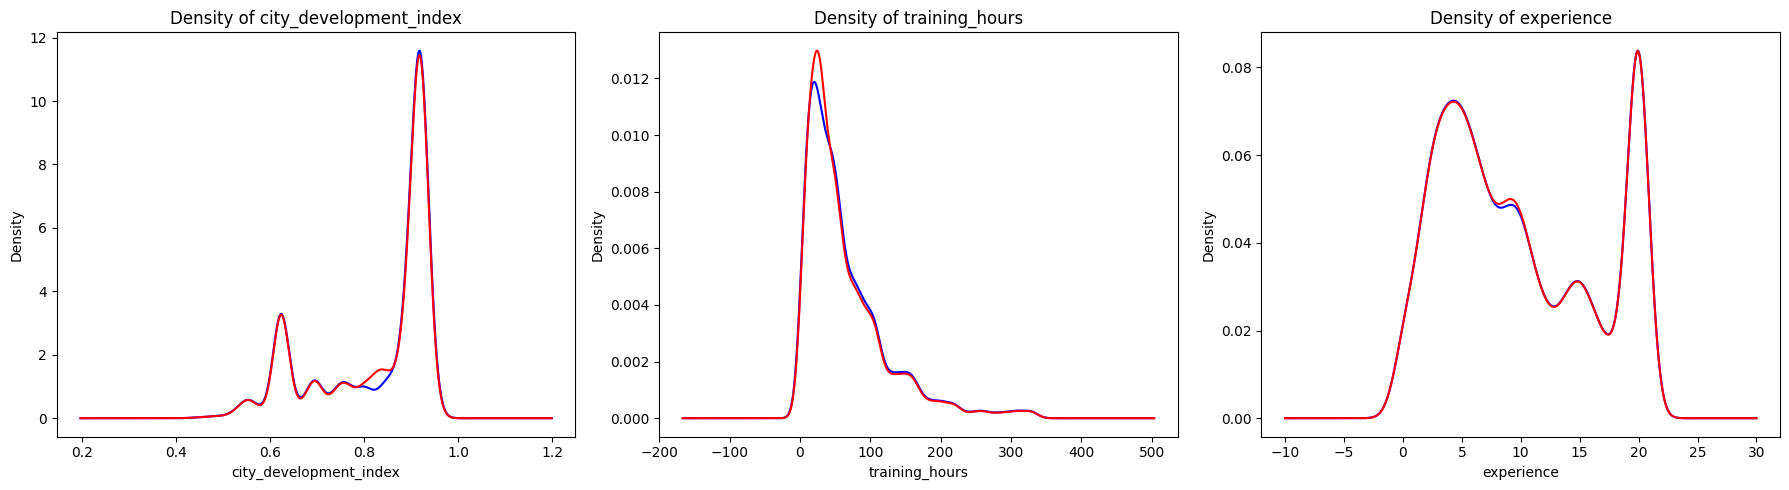

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

columns_old = ['city_development_index', 'training_hours', 'experience']

for i, col in enumerate(columns_old):
    X[col].plot.density(ax=axes[i], color='blue', label='Original')
    X[f"{col}_filled"].plot.density(ax=axes[i], color='red', label='Filled')
    axes[i].set_title(f"Density of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Density")

plt.tight_layout()
plt.show()

### Changes in Variance

In [45]:
print('Original Experience variable variance: ', X['experience'].var())
print('Filled Experience variable variance: ', X['experience_filled'].var())

Original Experience variable variance:  42.318516765484425
Filled Experience variable variance:  42.17784170322686


In [46]:
X.cov()

,city_development_index,experience,training_hours,city_development_index_filled,experience_filled,training_hours_filled
city_development_index,0.015211,0.266895,-0.015343,0.015211,0.266185,-0.003215
experience,0.266895,42.318517,-0.317638,0.260227,42.318517,0.078729
training_hours,-0.015343,-0.317638,3586.288193,-0.014950,-0.335274,3586.288193
city_development_index_filled,0.015211,0.260227,-0.014950,0.014831,0.259529,-0.003135
experience_filled,0.266185,42.318517,-0.335274,0.259529,42.177842,0.061431
training_hours_filled,-0.003215,0.078729,3586.288193,-0.003135,0.061431,3495.969463


## Mean Median Imputation using Scikit Learn

In [47]:
imputer1 = SimpleImputer(strategy='mean')
imputer2 = SimpleImputer(strategy='median')
imputer3 = SimpleImputer(strategy='most_frequent')

In [48]:
trf = ColumnTransformer([
    ('imp1', imputer1, ['experience']),
    ('imp2', imputer2, ['city_development_index']),
    ('imp3', imputer3, ['training_hours']),
], remainder='passthrough')

In [49]:
trf.fit(X)

,transformers,"[('imp1', ...), ('imp2', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'mean'
,fill_value,None


In [52]:
X = trf.transform(X)
X

array([[ 20.   ,   0.92 ,  36.   ,   0.92 ,  20.   ,  36.   ],
       [ 15.   ,   0.776,  47.   ,   0.776,  15.   ,  47.   ],
       [  5.   ,   0.624,  83.   ,   0.624,   5.   ,  83.   ],
       ...,
       [ 20.   ,   0.92 ,  44.   ,   0.92 ,  20.   ,  44.   ],
       [  0.   ,   0.802,  97.   ,   0.802,   0.   ,  97.   ],
       [  2.   ,   0.855, 127.   ,   0.855,   2.   , 127.   ]],
      shape=(19158, 6))